In [9]:
import pandas as pd 
import numpy as np


In [2]:
df=pd.read_csv("New_Emotion_Editing.csv")

In [3]:
df

,Consent_Initial_Consent_Confirmation,Consent_1_Voluntary_Participation_Acknowledgement,Consent_2_Data_Access_Permission,Consent_3_Future_Research_Consent,Consent_4_Study_Participation_Agreement,Demographics_Department_Selected,Demographics_2_Years_At_Company_Selected,Demographics_4_Current_Role,Demographics_5_Primary_Work_Arrangement,Self-Regulations,...,Perception of EI,Perception of EI .1,Perception of EI .2,Perception of EI .3,Perception of EI .4,Training Needs,Training Needs .1,Training Needs .2,Training Needs .3,Training Needs .4
0,YES,YES,YES,YES,I agree,T&E,1-5 years,AV specialist,Other,6,...,7,6,6,7,7,3,6,2,7,7
1,YES,YES,YES,YES,I agree,Sales,5-10 years,Sales representative,Remote,6,...,7,6,6,7,6,7,7,7,7,7
2,YES,YES,YES,YES,I agree,Marketing,5-10 years,Marketing Specialist,Remote,6,...,7,6,6,7,5,7,7,7,7,7
3,YES,YES,YES,YES,I agree,Marketing,More than 10 years,Market development,Hybrid,5,...,7,7,7,7,6,7,7,7,7,7
4,YES,YES,YES,YES,I agree,Finance,More than 10 years,Principal financial analyst,Remote,6,...,5,4,4,4,5,4,4,4,4,5
5,YES,YES,YES,YES,I agree,Marketing,1-5 years,Individual Contributor,Remote,6,...,7,7,7,7,6,3,7,7,7,7
6,YES,YES,YES,YES,I agree,Finance,1-5 years,Sr Financial Analyst,Remote,5,...,7,6,6,5,5,5,4,6,7,7
7,YES,YES,YES,YES,I agree,Operations,5-10 years,EO,Remote,6,...,7,7,6,7,6,6,6,7,7,6
8,YES,YES,YES,YES,I agree,Marketing,1-5 years,Market Development Specialist,Remote,7,...,7,7,7,7,7,7,7,7,7,7
9,YES,YES,YES,YES,I agree,Marketing,More than 10 years,Senior Market Development Manager,Remote,6,...,7,7,7,6,6,6,7,6,7,6


### Reliability Testing (Cronbach's Alpha): 

In [4]:
survey_items = df.iloc[:, 9:]

In [5]:
N = survey_items.shape[1]


In [7]:
variances = survey_items.var(axis=0)
β = variances.mean()

In [10]:
covariance_matrix = survey_items.cov()
average_covariance = covariance_matrix.values[np.triu_indices_from(covariance_matrix, k=1)].mean()


In [11]:
α = (N * average_covariance) / (β + (N - 1) * average_covariance)


In [12]:
print(f"Cronbach's Alpha: {α:.3f}")


Cronbach's Alpha: 0.982


### Correlation Analysis (Spearman's Correlation)

In [14]:
from scipy.stats import spearmanr


relevant_columns = df.columns[14:24]  

correlation_matrix = pd.DataFrame(index=relevant_columns, columns=relevant_columns)
p_value_matrix = pd.DataFrame(index=relevant_columns, columns=relevant_columns)

for col1 in relevant_columns:
    for col2 in relevant_columns:
        if col1 == col2:
            correlation_matrix.loc[col1, col2] = 1.0
            p_value_matrix.loc[col1, col2] = 0.0
        else:
            rho, p_value = spearmanr(df[col1], df[col2])
            correlation_matrix.loc[col1, col2] = rho
            p_value_matrix.loc[col1, col2] = p_value

#print("Spearman's Correlation Coefficients (ρ):")
#print(correlation_matrix)

#print("\nP-values:")
#print(p_value_matrix)


In [15]:
correlation_matrix

,Empathy,Empathy .1,Empathy .2,Empathy .3,Empathy .4,Social Skills,Social Skills .1,Social Skills .2,Social Skills .3,Social Skills .4
Empathy,1.0,0.827867,0.685259,0.548766,0.396191,0.590848,0.602256,0.494328,0.336442,0.573392
Empathy .1,0.827867,1.0,0.716631,0.694045,0.467933,0.443374,0.663029,0.652883,0.493819,0.724803
Empathy .2,0.685259,0.716631,1.0,0.464159,0.508543,0.335672,0.559379,0.40873,0.500939,0.590307
Empathy .3,0.548766,0.694045,0.464159,1.0,0.395536,0.302752,0.523057,0.400855,0.234023,0.514512
Empathy .4,0.396191,0.467933,0.508543,0.395536,1.0,0.015706,0.450602,0.239896,0.170216,0.322613
Social Skills,0.590848,0.443374,0.335672,0.302752,0.015706,1.0,0.324724,0.301431,0.175757,0.409338
Social Skills .1,0.602256,0.663029,0.559379,0.523057,0.450602,0.324724,1.0,0.714296,0.500336,0.461939
Social Skills .2,0.494328,0.652883,0.40873,0.400855,0.239896,0.301431,0.714296,1.0,0.586859,0.560713
Social Skills .3,0.336442,0.493819,0.500939,0.234023,0.170216,0.175757,0.500336,0.586859,1.0,0.733429
Social Skills .4,0.573392,0.724803,0.590307,0.514512,0.322613,0.409338,0.461939,0.560713,0.733429,1.0


In [16]:
p_value_matrix

,Empathy,Empathy .1,Empathy .2,Empathy .3,Empathy .4,Social Skills,Social Skills .1,Social Skills .2,Social Skills .3,Social Skills .4
Empathy,0.0,0.000002,0.000433,0.008175,0.067948,0.003786,0.003018,0.019359,0.125777,0.005274
Empathy .1,0.000002,0.0,0.000175,0.00034,0.02808,0.038756,0.000771,0.000988,0.019504,0.000136
Empathy .2,0.000433,0.000175,0.0,0.029548,0.015659,0.1267,0.006795,0.058937,0.017559,0.003826
Empathy .3,0.008175,0.00034,0.029548,0.0,0.068445,0.170832,0.012495,0.064482,0.29453,0.014287
Empathy .4,0.067948,0.02808,0.015659,0.068445,0.0,0.944693,0.035329,0.282226,0.448851,0.143098
Social Skills,0.003786,0.038756,0.1267,0.170832,0.944693,0.0,0.140351,0.172798,0.433996,0.058525
Social Skills .1,0.003018,0.000771,0.006795,0.012495,0.035329,0.140351,0.0,0.000188,0.017718,0.030439
Social Skills .2,0.019359,0.000988,0.058937,0.064482,0.282226,0.172798,0.000188,0.0,0.00409,0.006636
Social Skills .3,0.125777,0.019504,0.017559,0.29453,0.448851,0.433996,0.017718,0.00409,0.0,0.000103
Social Skills .4,0.005274,0.000136,0.003826,0.014287,0.143098,0.058525,0.030439,0.006636,0.000103,0.0


### Multiple Regression Analysis

In [22]:
import statsmodels.api as sm

dependent_var = 'Empathy'  

empathy_columns = [col for col in df.columns if 'Empathy' in col]

independent_vars = [col for col in df.columns if 'Self-Regulations' in col or
                                                  'Social Skills' in col or
                                                  'Self Awareness' in col or
                                                  'Motivation' in col or
                                                  'Perception of EI' in col or
                                                  'Training Needs' in col]

selected_columns = empathy_columns + independent_vars
df = df[selected_columns].dropna()

# Define X and Y
X = df[independent_vars]
Y = df[empathy_columns[0]] 

X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()

# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Empathy      R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     604.0
Date:                Sun, 29 Dec 2024   Prob (F-statistic):             0.0321
Time:                        00:08:19   Log-Likelihood:                 65.651
No. Observations:                  22   AIC:                            -89.30
Df Residuals:                       1   BIC:                            -66.39
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   55.7086 

### Visualization

#### Heatmaps

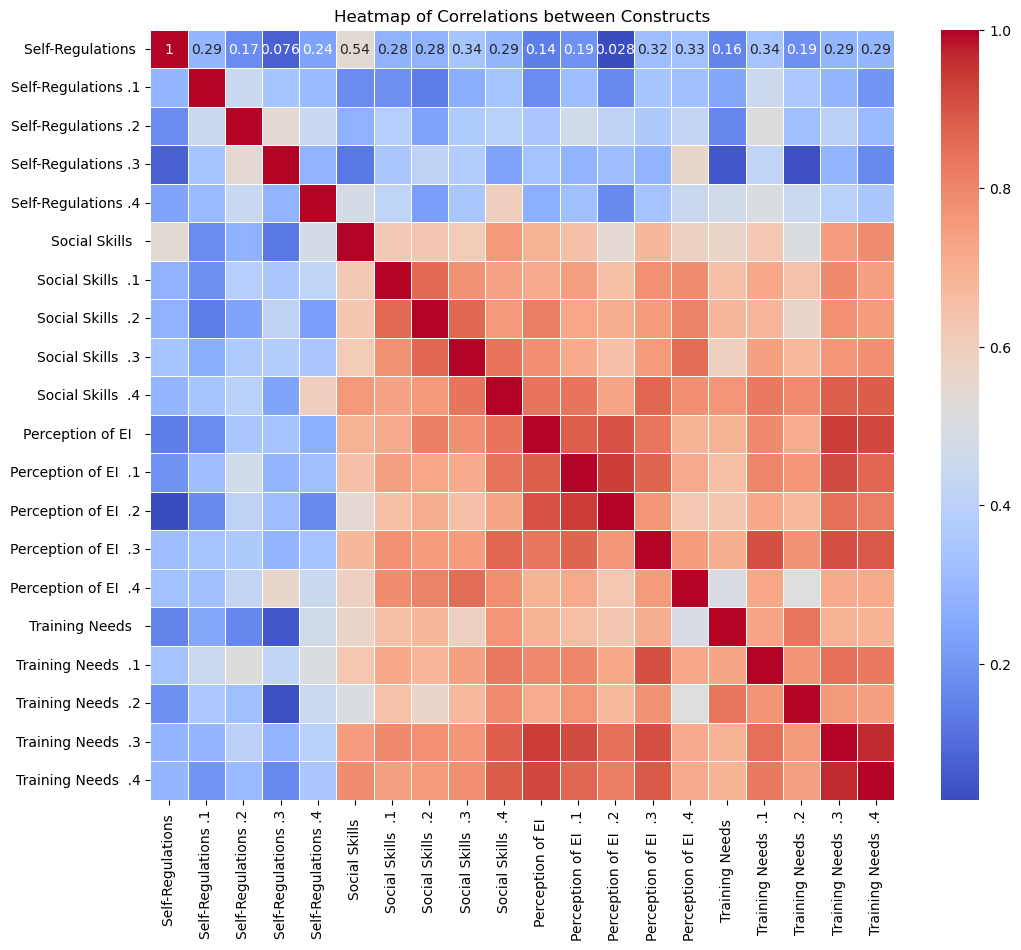

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns


relevant_columns = [col for col in df.columns if 'Self-Regulations' in col or
                                                  'Social Skills' in col or
                                                  'Self Awareness' in col or
                                                  'Motivation' in col or
                                                  'Perception of EI' in col or
                                                  'Training Needs' in col]

# Calculate the correlation matrix
correlation_matrix = df[relevant_columns].corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlations between Constructs')
plt.show()

##### Radar charts

In [26]:
from math import pi


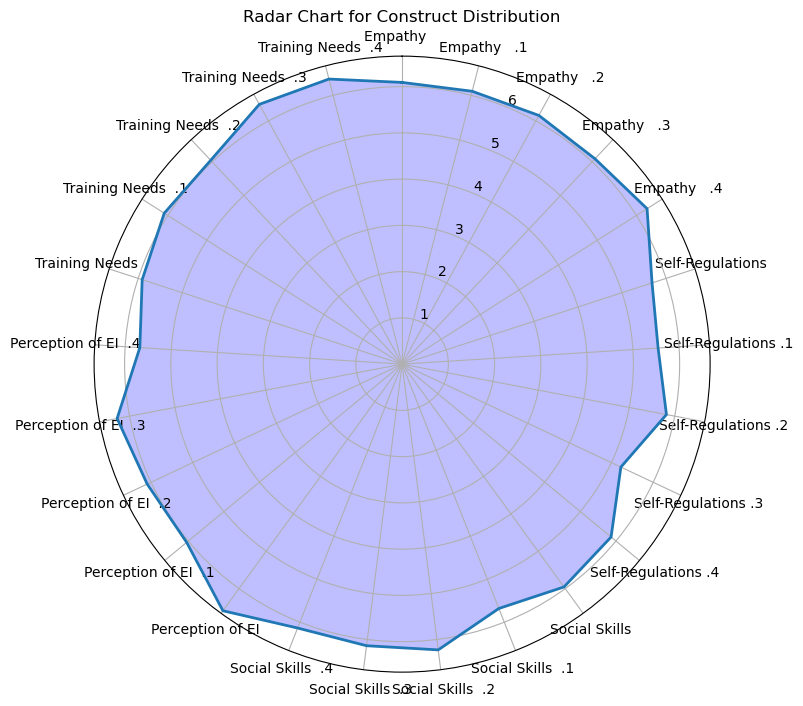

In [32]:
relevant_columns = ['Empathy   ', 'Empathy   .1', 'Empathy   .2', 'Empathy   .3', 'Empathy   .4',
                    'Self-Regulations ', 'Self-Regulations .1', 'Self-Regulations .2', 'Self-Regulations .3', 'Self-Regulations .4',
                    'Social Skills  ', 'Social Skills  .1', 'Social Skills  .2', 'Social Skills  .3', 'Social Skills  .4',
                    'Perception of EI  ', 'Perception of EI  .1', 'Perception of EI  .2', 'Perception of EI  .3', 'Perception of EI  .4',
                    'Training Needs  ', 'Training Needs  .1', 'Training Needs  .2', 'Training Needs  .3', 'Training Needs  .4']

mean_values = df[relevant_columns].mean()

num_vars = len(relevant_columns)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

mean_values = pd.concat([mean_values, pd.Series(mean_values.iloc[0])])
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

ax.plot(angles, mean_values, linewidth=2, linestyle='solid')
ax.fill(angles, mean_values, 'b', alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(relevant_columns)

plt.title('Radar Chart for Construct Distribution')
plt.show()

### Data Preprocessing


In [36]:
from sklearn.preprocessing import StandardScaler


In [37]:
independent_vars = ['Self-Regulations ', 'Self-Regulations .1', 'Self-Regulations .2', 'Self-Regulations .3', 'Self-Regulations .4',
                    'Empathy   ', 'Empathy   .1', 'Empathy   .2', 'Empathy   .3', 'Empathy   .4',
                    'Social Skills  ', 'Social Skills  .1', 'Social Skills  .2', 'Social Skills  .3', 'Social Skills  .4',
                    'Training Needs  ', 'Training Needs  .1', 'Training Needs  .2', 'Training Needs  .3', 'Training Needs  .4']

dependent_vars = ['Empathy   ']  # استخدم "Empathy" كمثال للمتغير التابع

print(df[independent_vars + dependent_vars].isnull().sum())

df.fillna(df.mean(), inplace=True)

scaler = StandardScaler()
df[independent_vars + dependent_vars] = scaler.fit_transform(df[independent_vars + dependent_vars])

Self-Regulations       0
Self-Regulations .1    0
Self-Regulations .2    0
Self-Regulations .3    0
Self-Regulations .4    0
Empathy                0
Empathy   .1           0
Empathy   .2           0
Empathy   .3           0
Empathy   .4           0
Social Skills          0
Social Skills  .1      0
Social Skills  .2      0
Social Skills  .3      0
Social Skills  .4      0
Training Needs         0
Training Needs  .1     0
Training Needs  .2     0
Training Needs  .3     0
Training Needs  .4     0
Empathy                0
dtype: int64


### Multiple Regression Analysis

In [38]:
X = df[independent_vars]
y = df['Empathy   ']  

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()


print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Empathy      R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.290e+27
Date:                Sun, 29 Dec 2024   Prob (F-statistic):           1.20e-14
Time:                        00:22:23   Log-Likelihood:                 701.62
No. Observations:                  22   AIC:                            -1361.
Df Residuals:                       1   BIC:                            -1338.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5.551e-17   3

### Multicollinearity

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)


                Feature         VIF
0                 const    1.000000
1     Self-Regulations    11.951926
2   Self-Regulations .1    3.079504
3   Self-Regulations .2    3.955247
4   Self-Regulations .3   11.729758
5   Self-Regulations .4   10.215377
6            Empathy      93.060678
7          Empathy   .1   96.756052
8          Empathy   .2   12.122490
9          Empathy   .3   15.239419
10         Empathy   .4   36.804960
11      Social Skills     33.724835
12    Social Skills  .1   10.057813
13    Social Skills  .2   58.304920
14    Social Skills  .3   60.441057
15    Social Skills  .4   43.607782
16     Training Needs     22.653970
17   Training Needs  .1   18.982198
18   Training Needs  .2   32.812555
19   Training Needs  .3   93.231188
20   Training Needs  .4  103.560543


### Homoscedasticity

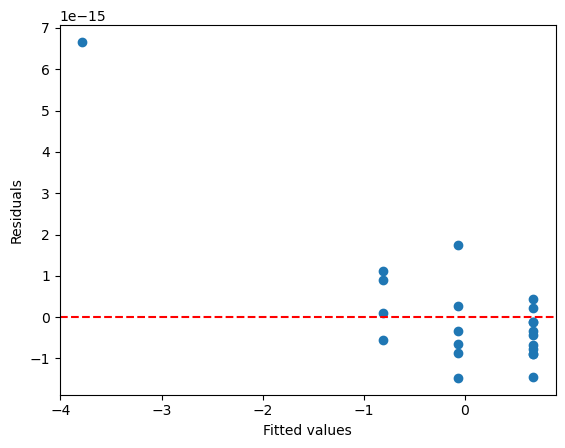

In [44]:
residuals = model.resid
fitted = model.fittedvalues

plt.scatter(fitted, residuals)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.show()


### Normality

Shapiro-Wilk test: ShapiroResult(statistic=0.6637122631072998, pvalue=6.994547220529057e-06)


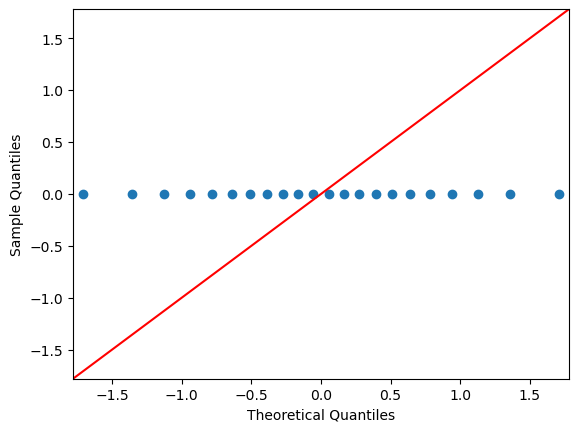

In [45]:
from scipy.stats import shapiro
import scipy.stats as stats

shapiro_test = shapiro(residuals)
print('Shapiro-Wilk test:', shapiro_test)

#  Q-Q plot
sm.qqplot(residuals, line ='45')
plt.show()
